In [1]:
!pip install matplotlib
!pip install pandas
!pip install keras
!pip install tensorflow_hub

You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.


In [174]:
import tensorflow_datasets as tfds
from tensorflow.keras.layers import Input, Flatten, Dense, Conv2D, BatchNormalization, LeakyReLU, Dropout, Activation
from tensorflow.keras import Model
from tensorflow.compat.v1.keras.backend import set_session
from tensorflow.python.client import device_lib
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
#import tensorflow.keras.backend as K 

import tensorflow as tf
import pandas as pd
import copy
import os
import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import random
import numpy

# Self-Driving Car Engineer Nanodegree

## Sample of creation of traffic sign recognition NN



---
## Step 0: Load The Data

In [171]:
# Load pickled data
import pickle
import pandas as pd
# TODO: Fill this in based on where you saved the training and testing data

training_file = './data/train.p'
validation_file= './data/valid.p'
testing_file = './data/test.p'

labels_file = './data/signnames.csv'
labels = pd.read_csv(labels_file)


with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    


Now  lets take train , test, and validation pairs :

In [172]:
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']
labels

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [5]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = (X_train.shape[1] , X_train.shape[2])

# TODO: How many unique classes/labels there are in the dataset.
n_classes = max(test['labels'])

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 42


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [6]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

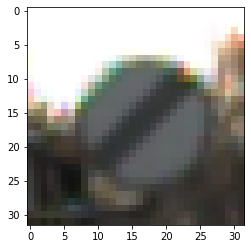

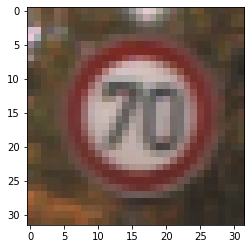

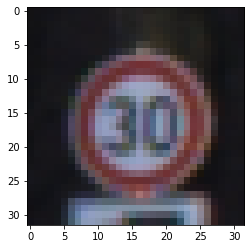

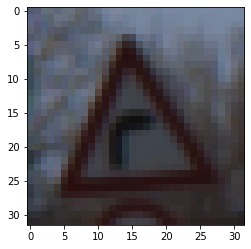

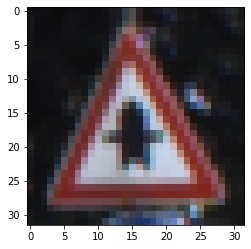

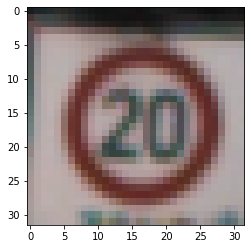

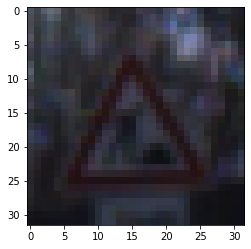

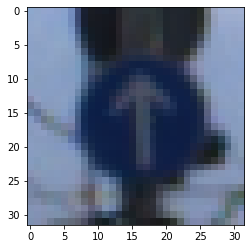

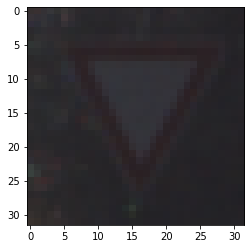

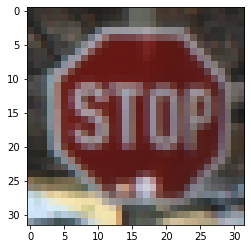

In [7]:
fig = plt.figure()
for sample in range(0,10):

    im = plt.imshow(X_train[random.randrange(0,n_train)])
    plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

### Lets convert labels to vectors. 
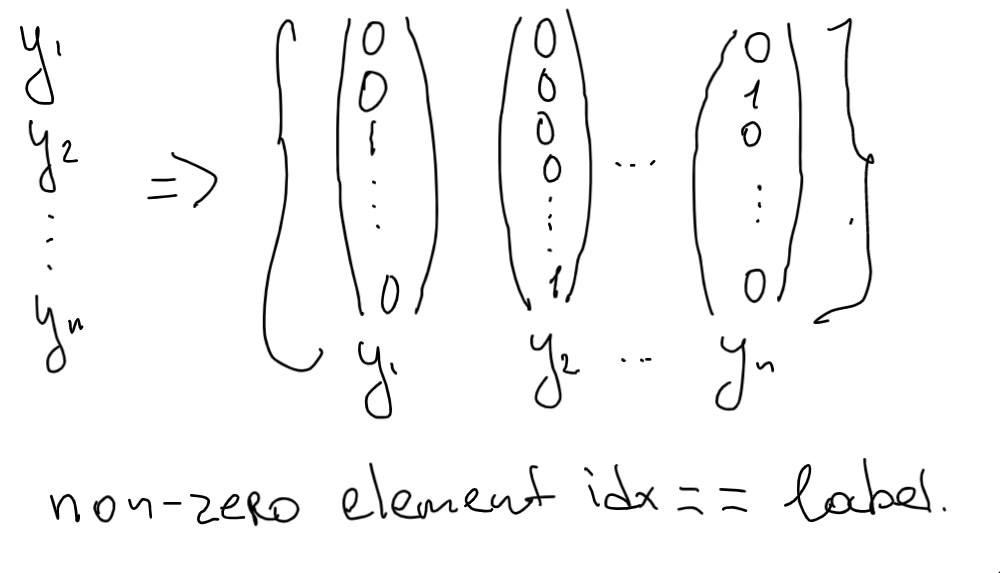

#### General overview of data for train structure
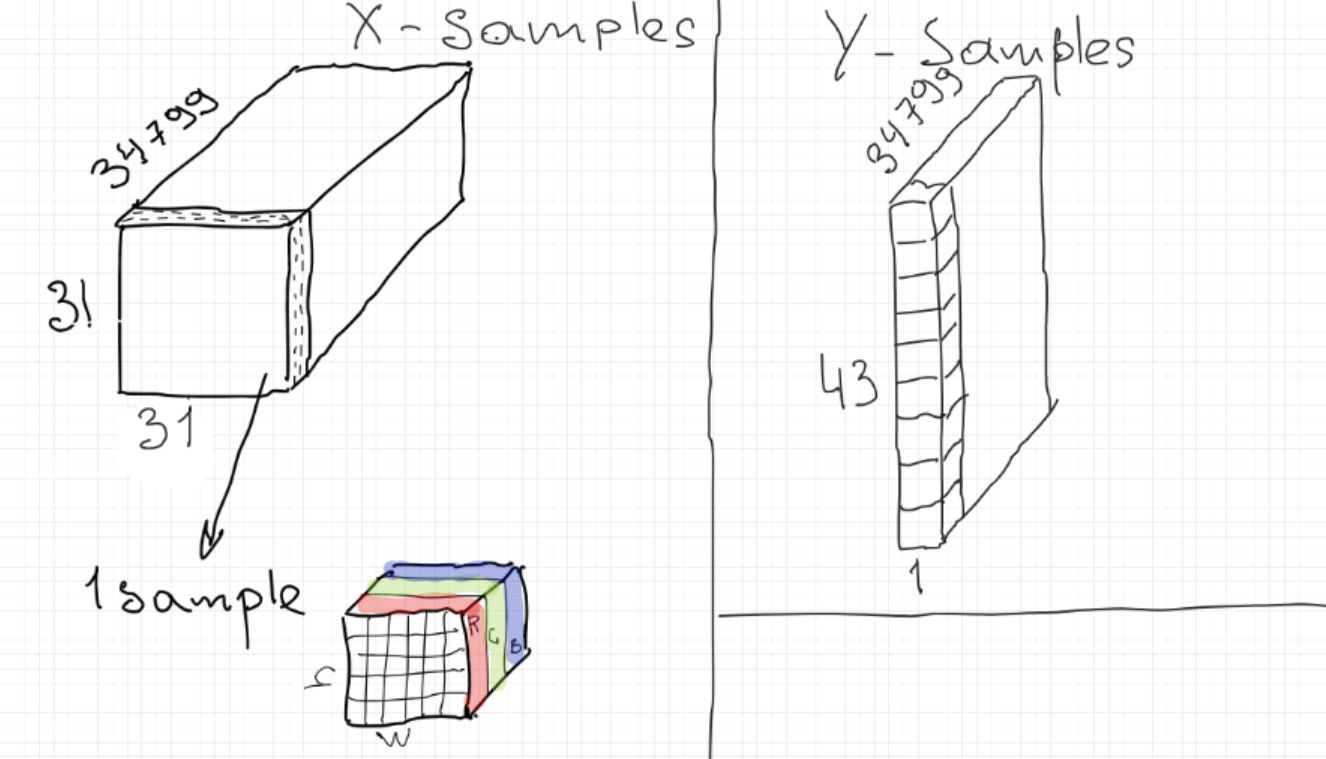

In [4]:
y_tain_vec = np.zeros((y_train.shape[0],43))
y_valid_vec = np.zeros((y_valid.shape[0],43))
y_test_vec = np.zeros((y_test.shape[0],43))
for i, ix in enumerate(y_train):
    y_tain_vec[i][ix] = 1
    
for i, ix in enumerate(y_valid):
    y_valid_vec[i][ix] = 1
    
for i, ix in enumerate(y_test):
    y_test_vec[i][ix] = 1

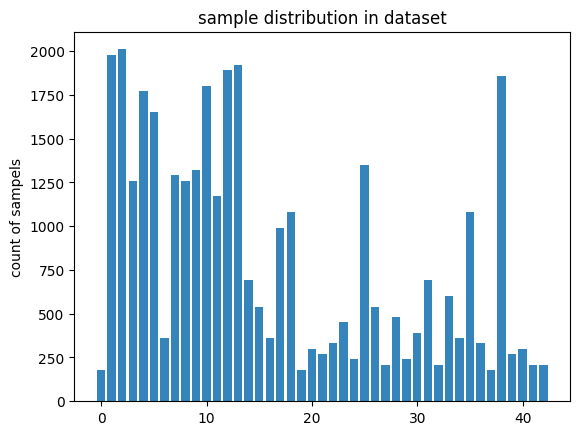

In [195]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

labels_list = labels["SignName"].values.tolist()
unique, counts = numpy.unique(y_train, return_counts=True)
y_pos = np.arange(len(labels_list))
plt.ylabel('count of sampels')
plt.title('sample distribution in dataset')
plt.bar(y_pos, counts, align='center', alpha=0.9)
plt.show()


## Now lets prepare dataset

#### Convert to grayscale (optional)

In general this is not good idea convert to grayscale in traffic signs recognition.
1. There are some similar sign that have difference most only in color schemes.
2. Color information in signs have important sense


In [8]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

X_train_gray_scale = X_train #tf.image.rgb_to_grayscale(X_train)
X_valid_gray_scale = X_valid #tf.image.rgb_to_grayscale(X_valid)
X_test_gray_scale = X_test   #tf.image.rgb_to_grayscale(X_test)
#X_train = rgb2gray(X_train)
# X_valid = rgb2gray(X_valid)
# X_test = rgb2gray(X_test)

print(X_train.shape)

(34799, 32, 32, 3)


#### Normilize image 


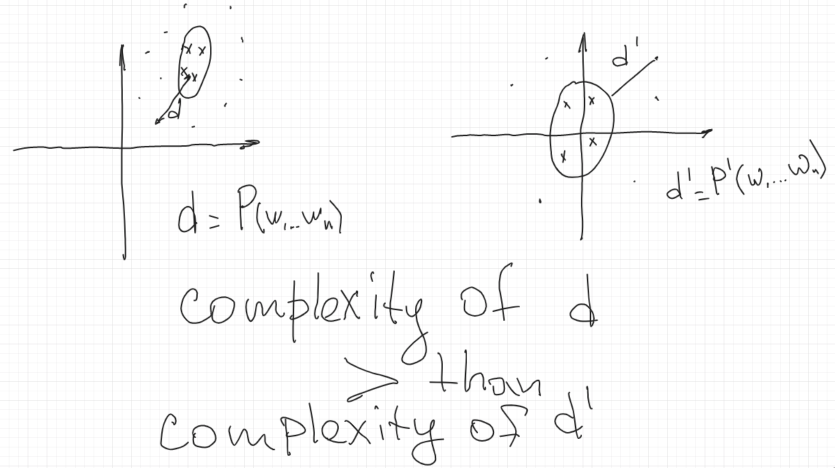

In [9]:
def normalize(im):
    return (im -128) / 128

X_train_normalized = normalize(X_train)
X_valid_normalized = normalize(X_valid)
X_test_normalized = normalize(X_test)


In [12]:
!rm -rf ./logs/

### Model Architecture

Main architecture 

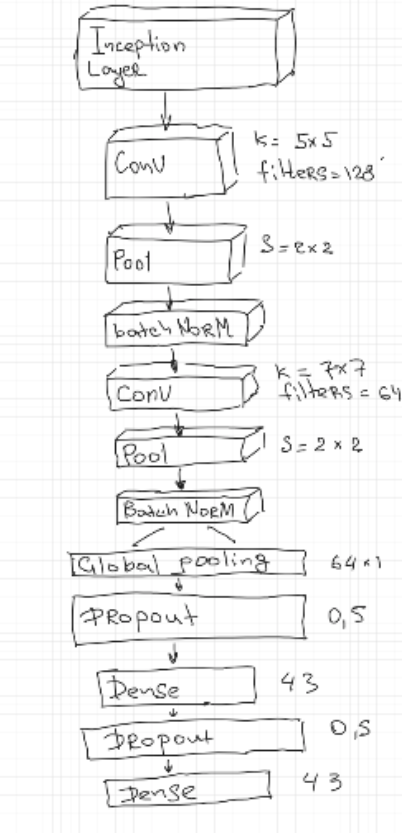

##### Inception Layer architecture

Inception layers is a state of art aproach in computer vision. 
Inception layer help us :
1. To avoid gradients vanishing gradient problem. 
2. More stability on image scale

To understand the importance of the inception layer’s structure, look at the Hebbian principle from human learning. This says that “neurons that fire together, wire together”.


“(Inception Layer) is a combination of all those layers (namely, 1×1 Convolutional layer, 3×3 Convolutional layer, 5×5 Convolutional layer) with their output filter banks concatenated into a single output vector forming the input of the next stage.”

Links : 
https://en.wikipedia.org/wiki/Vanishing_gradient_problem

https://medium.com/analytics-vidhya/inception-network-and-its-derivatives-e31b14388bf9



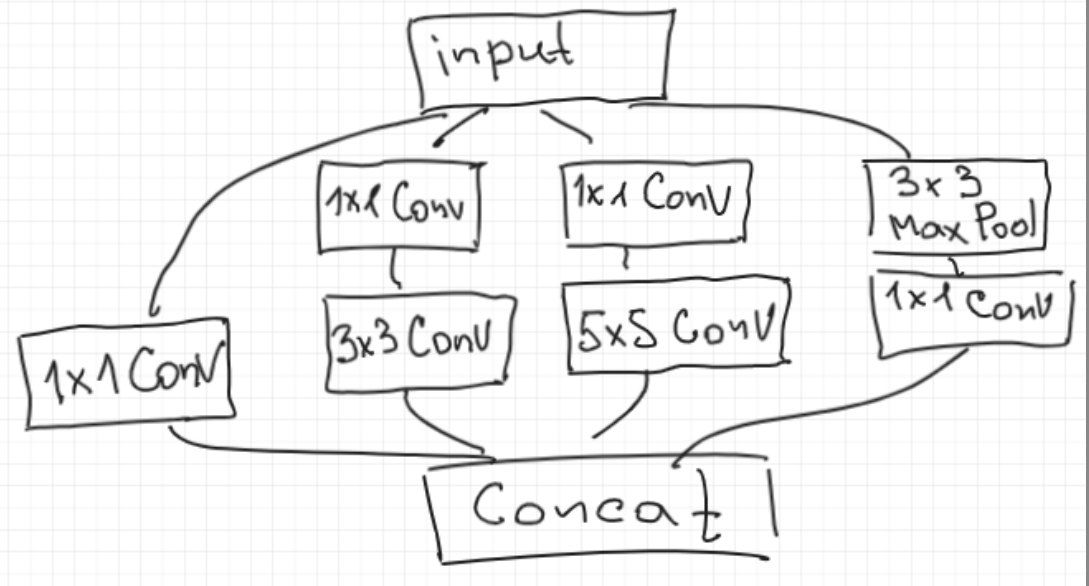

In [267]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

import datetime
class InceptionLayer(tf.keras.layers.Layer):
    def __init__(self,
                filters_1x1=64,
                filters_3x3_reduce=96,
                filters_3x3=128,
                filters_5x5_reduce=16,
                filters_5x5=32,
                filters_pool_proj=32,
                    name = 'inception'):
        super(InceptionLayer,self).__init__()
        """ Create an Inception Layer """
    
        self.conv_1x1 = tf.keras.layers.Conv2D(filters_1x1, (1, 1), padding='same', activation='relu')
        self.conv_3x3_1 = tf.keras.layers.Conv2D(filters_3x3_reduce, (1, 1), padding='same', activation='relu')
        self.conv_3x3_2 = tf.keras.layers.Conv2D(filters_3x3, (3, 3), padding='same', activation='relu')
        self.conv_5x5_1 = tf.keras.layers.Conv2D(filters_5x5_reduce, (1, 1), padding='same', activation='relu')
        self.conv_5x5_2 = tf.keras.layers.Conv2D(filters_5x5, (5, 5), padding='same', activation='relu')
        self.pool_proj_1 = tf.keras.layers.MaxPool2D((3, 3), strides=(1, 1), padding='same')
        self.pool_proj_2 = tf.keras.layers.Conv2D(filters_pool_proj, (1, 1), padding='same', activation='relu')
    
    
    def call(self,x):
        conv_1x1 = self.conv_1x1(x)
        #print("conv_1x1 " , conv_1x1.shape)

        conv_3x3 = self.conv_3x3_1(x)
        conv_3x3 = self.conv_3x3_2(conv_3x3)
        #print("conv_3x3 " , conv_3x3.shape)
        conv_5x5 = self.conv_5x5_1(x)
        conv_5x5 = self.conv_5x5_2(conv_5x5)
        #print("conv_5x5 " , conv_5x5.shape)
        pool_proj = self.pool_proj_1(x)
        pool_proj = self.pool_proj_2(pool_proj)
        #print("pool_proj " , pool_proj.shape)

        output = tf.concat([conv_1x1, conv_3x3, conv_5x5, pool_proj], axis=3)
        #print("output" , output.shape)
        return output
        

    
class TrafficClassifierModel(tf.keras.Model):
    def __init__(self):
        super(TrafficClassifierModel,self).__init__()
        self.incept = InceptionLayer(32,48,48,8,16,16)
        
        self.conv1 = tf.keras.layers.Conv2D(filters =  64, kernel_size=(5,5), 
                                            strides=(1, 1), padding='valid', activation='relu' )
        self.pool1 = tf.keras.layers.MaxPool2D( strides=(2,2) )
        self.batchNorm1 = tf.keras.layers.BatchNormalization()
        
        self.conv2 = tf.keras.layers.Conv2D(filters =  64, kernel_size=(7,7), 
                                            strides=(1, 1), padding='valid', activation='relu' )
        self.pool2 = tf.keras.layers.MaxPool2D( strides=(2,2) )
        
        
        self.conv3 = tf.keras.layers.Conv2D(filters =  128, kernel_size=(5,5), 
                                    strides=(1, 1), padding='valid', activation='relu' )
        self.pool3 = tf.keras.layers.MaxPool2D( strides=(2,2) )
        
        self.dropout1 = tf.keras.layers.Dropout(0.5)
        self.dropout2 = tf.keras.layers.Dropout(0.3)
        self.conv = tf.keras.layers.Conv2D(filters = 128, kernel_size=(5,5), 
                                            strides=(1, 1), padding='valid', activation='relu' )
        
        self.global_pool = tf.keras.layers.GlobalAveragePooling2D()
        self.batchNorm2 = tf.keras.layers.BatchNormalization()
        self.batchNorm3 = tf.keras.layers.BatchNormalization()
        self.head1 = tf.keras.layers.Dense( 43 )
        self.head2 = tf.keras.layers.Dense( 43 )
        
        
    def call(self, x):
        x = self.incept(x)
    
        x = self.conv1(x)
        x = self.pool1(x)
        
        x = self.batchNorm1(x)
        x = self.conv2(x)
        x = self.pool2(x)
        x = self.batchNorm2(x)
        x = self.global_pool(x)
        x = self.dropout1(x)
        x = self.head1(x)
        x = self.dropout2(x)
        x = self.head2(x)

        return x



### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [197]:
model = TrafficClassifierModel()

              
base_learning_rate = 0.005
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.001, beta_1=0.8, beta_2=0.9, epsilon=1e-07, amsgrad=False,
    name='Adam'),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

print(X_train.shape)
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


model.fit(
    x=X_train_normalized, y=y_tain_vec, batch_size=150, epochs=200, verbose=1,callbacks=[tensorboard_callback],
    validation_split=0.0, validation_data=(X_valid_normalized,y_valid_vec), shuffle=True, class_weight=None,
    initial_epoch=0, max_queue_size=10, workers=3, use_multiprocessing=True  
)

(34799, 32, 32, 3)
Epoch 1/200
232/232 [==============================] - 4s 17ms/step - loss: 0.2966 - accuracy: 0.0428 - val_loss: 0.1060 - val_accuracy: 0.0678
Epoch 2/200
232/232 [==============================] - 4s 16ms/step - loss: 0.0991 - accuracy: 0.1767 - val_loss: 0.0980 - val_accuracy: 0.1580
Epoch 3/200
232/232 [==============================] - 4s 16ms/step - loss: 0.0806 - accuracy: 0.3394 - val_loss: 0.0873 - val_accuracy: 0.3091
Epoch 4/200
232/232 [==============================] - 4s 16ms/step - loss: 0.0688 - accuracy: 0.4364 - val_loss: 0.0680 - val_accuracy: 0.4084
Epoch 5/200
232/232 [==============================] - 4s 16ms/step - loss: 0.0605 - accuracy: 0.5171 - val_loss: 0.0590 - val_accuracy: 0.5088
Epoch 6/200
232/232 [==============================] - 4s 16ms/step - loss: 0.0539 - accuracy: 0.5885 - val_loss: 0.0527 - val_accuracy: 0.5898
Epoch 7/200
232/232 [==============================] - 4s 16ms/step - loss: 0.0488 - accuracy: 0.6451 - val_loss: 0.0

232/232 [==============================] - 4s 16ms/step - loss: 0.0110 - accuracy: 0.9729 - val_loss: 0.0120 - val_accuracy: 0.9683
Epoch 58/200
232/232 [==============================] - 4s 16ms/step - loss: 0.0108 - accuracy: 0.9729 - val_loss: 0.0120 - val_accuracy: 0.9626
Epoch 59/200
232/232 [==============================] - 4s 16ms/step - loss: 0.0108 - accuracy: 0.9728 - val_loss: 0.0107 - val_accuracy: 0.9635
Epoch 60/200
232/232 [==============================] - 4s 16ms/step - loss: 0.0107 - accuracy: 0.9748 - val_loss: 0.0107 - val_accuracy: 0.9678
Epoch 61/200
232/232 [==============================] - 4s 16ms/step - loss: 0.0104 - accuracy: 0.9752 - val_loss: 0.0112 - val_accuracy: 0.9528
Epoch 62/200
232/232 [==============================] - 4s 16ms/step - loss: 0.0103 - accuracy: 0.9754 - val_loss: 0.0127 - val_accuracy: 0.9689
Epoch 63/200
232/232 [==============================] - 4s 16ms/step - loss: 0.0103 - accuracy: 0.9752 - val_loss: 0.0150 - val_accuracy: 0.951

232/232 [==============================] - 4s 16ms/step - loss: 0.0073 - accuracy: 0.9865 - val_loss: 0.0096 - val_accuracy: 0.9739
Epoch 114/200
232/232 [==============================] - 4s 16ms/step - loss: 0.0070 - accuracy: 0.9866 - val_loss: 0.0118 - val_accuracy: 0.9660
Epoch 115/200
232/232 [==============================] - 4s 16ms/step - loss: 0.0071 - accuracy: 0.9876 - val_loss: 0.0094 - val_accuracy: 0.9728
Epoch 116/200
232/232 [==============================] - 4s 16ms/step - loss: 0.0071 - accuracy: 0.9872 - val_loss: 0.0081 - val_accuracy: 0.9766
Epoch 117/200
232/232 [==============================] - 4s 16ms/step - loss: 0.0072 - accuracy: 0.9863 - val_loss: 0.0095 - val_accuracy: 0.9748
Epoch 118/200
232/232 [==============================] - 4s 17ms/step - loss: 0.0070 - accuracy: 0.9878 - val_loss: 0.0105 - val_accuracy: 0.9741
Epoch 119/200
232/232 [==============================] - 4s 16ms/step - loss: 0.0069 - accuracy: 0.9880 - val_loss: 0.0100 - val_accuracy:

232/232 [==============================] - 4s 16ms/step - loss: 0.0058 - accuracy: 0.9901 - val_loss: 0.0069 - val_accuracy: 0.9819
Epoch 170/200
232/232 [==============================] - 4s 17ms/step - loss: 0.0059 - accuracy: 0.9905 - val_loss: 0.0075 - val_accuracy: 0.9782
Epoch 171/200
232/232 [==============================] - 4s 16ms/step - loss: 0.0057 - accuracy: 0.9905 - val_loss: 0.0093 - val_accuracy: 0.9787
Epoch 172/200
232/232 [==============================] - 4s 16ms/step - loss: 0.0057 - accuracy: 0.9912 - val_loss: 0.0080 - val_accuracy: 0.9814
Epoch 173/200
232/232 [==============================] - 4s 17ms/step - loss: 0.0058 - accuracy: 0.9914 - val_loss: 0.0085 - val_accuracy: 0.9746
Epoch 174/200
232/232 [==============================] - 4s 16ms/step - loss: 0.0059 - accuracy: 0.9907 - val_loss: 0.0080 - val_accuracy: 0.9830
Epoch 175/200
232/232 [==============================] - 4s 17ms/step - loss: 0.0057 - accuracy: 0.9910 - val_loss: 0.0101 - val_accuracy:

#### Tensor board
Good praxice to use tensorboard for parameters tuning

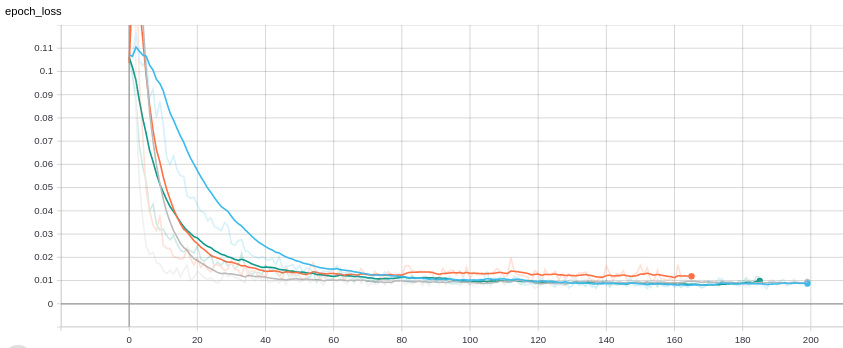
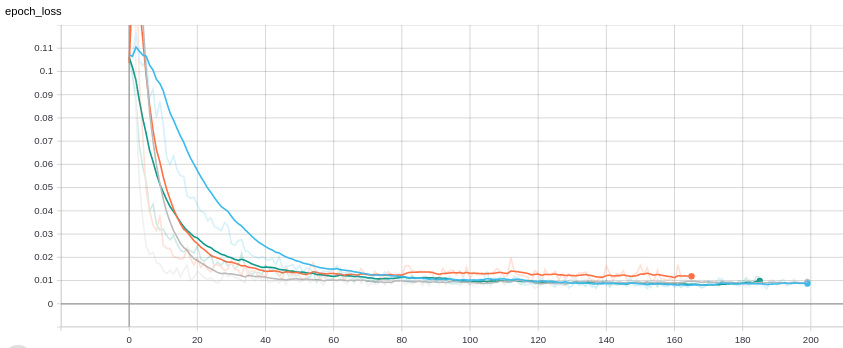


##### Verificate model on test data 

In [199]:
model.evaluate(X_test_normalized,y_test_vec)

395/395 [==============================] - 1s 3ms/step - loss: 0.0118 - accuracy: 0.9654


[0.011798140592873096, 0.9653998613357544]

#### Best Validation accuracy 0.983
#### Test accuracy 0.965
#### Best Train accuracy 0.992


---

## Step 3: Test a Model on New Images


### Load and Output the Images

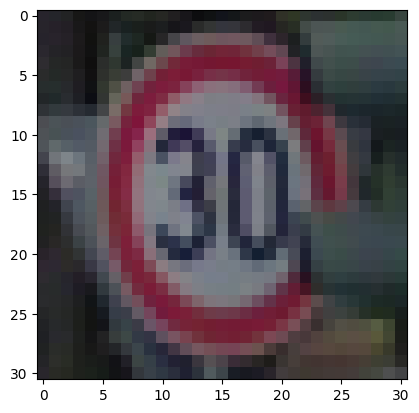

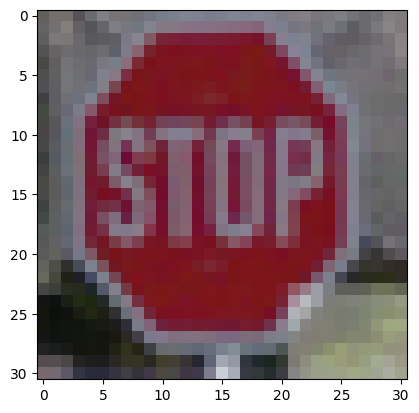

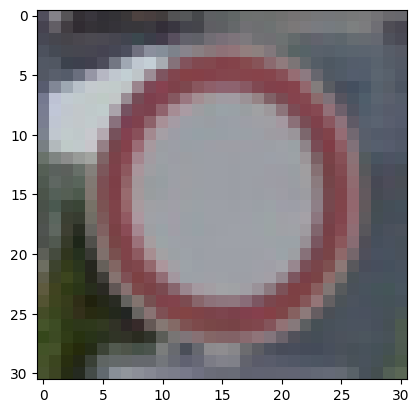

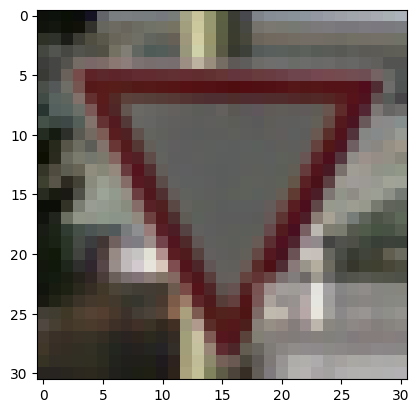

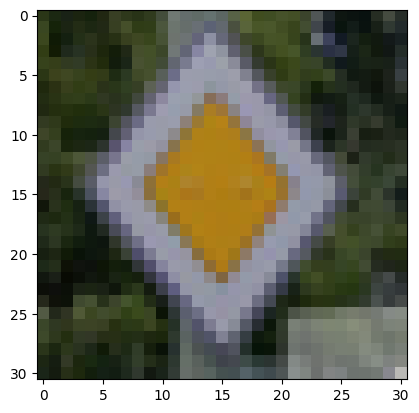

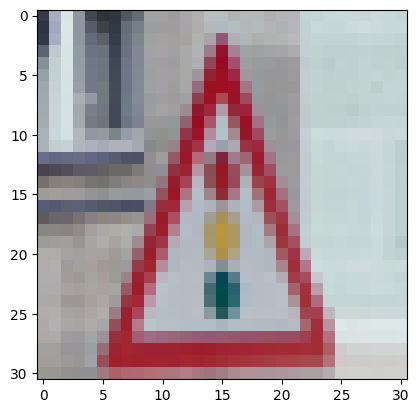

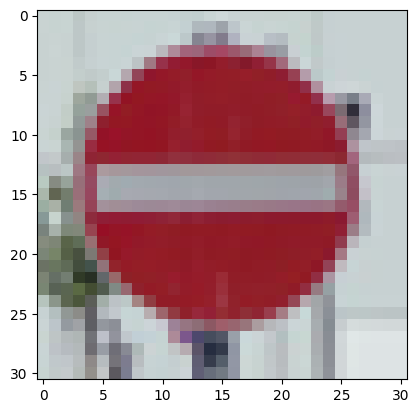

In [282]:
from PIL import Image
import glob

image_list = []
for filename in glob.glob('./real_photo/*.png'): #assuming gif
    im=Image.open(filename)
    im = im.resize((31,31)) 
    #im = np.array(im)
    image_list.append(im)
    
fig = plt.figure()

for sample in image_list:

    im = plt.imshow(sample)
    plt.show()


### Predict the Sign Type for Each Image

[ 12.90769  -18.370525 -25.233078 -26.242023 -26.379902]
tf.Tensor([1.0000000e+00 2.6064154e-14 2.7269304e-17 9.9425157e-18 8.6619649e-18], shape=(5,), dtype=float32)
Best score : Speed limit (30km/h)
Best score : tf.Tensor(1, shape=(), dtype=int32)


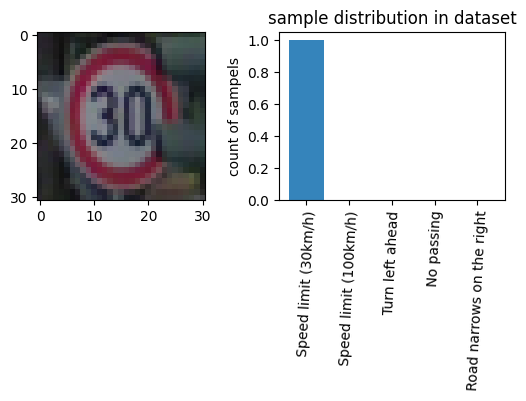

[  5.398525 -18.262785 -28.228554 -28.902012 -37.682545]
tf.Tensor([1.0000000e+00 5.2969219e-11 2.4885430e-15 1.2690128e-15 1.9504242e-19], shape=(5,), dtype=float32)
Best score : Stop
Best score : tf.Tensor(14, shape=(), dtype=int32)


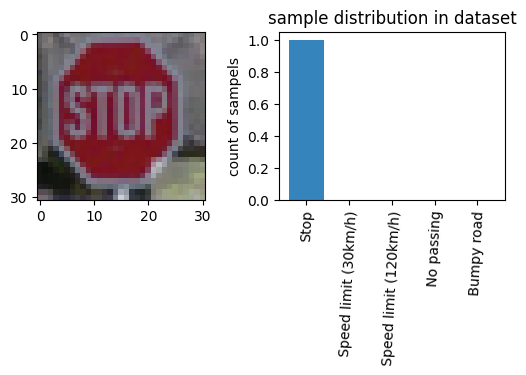

[ 12.6122265 -28.825514  -34.021614  -35.85443   -37.03962  ]
tf.Tensor([1.0000000e+00 1.0088301e-18 5.5870113e-21 8.9371120e-22 2.7319735e-22], shape=(5,), dtype=float32)
Best score : No vehicles
Best score : tf.Tensor(15, shape=(), dtype=int32)


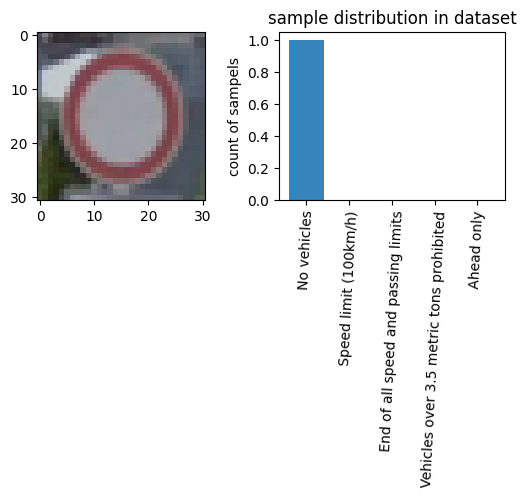

[ 19.605    -22.108597 -48.40657  -51.10472  -53.376183]
tf.Tensor([1.0000000e+00 7.6562354e-19 2.9037026e-30 1.9550605e-31 2.0168503e-32], shape=(5,), dtype=float32)
Best score : Yield
Best score : tf.Tensor(13, shape=(), dtype=int32)


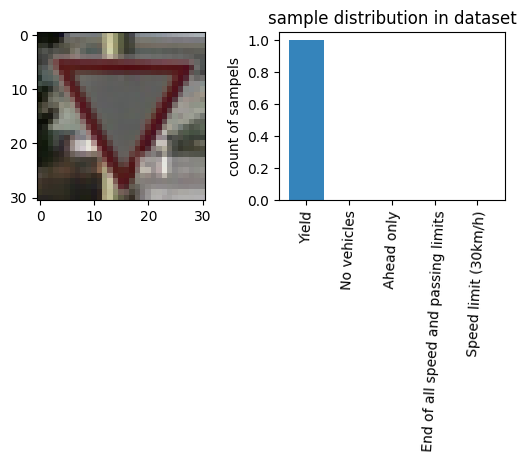

[ 10.661888 -20.478773 -23.23195  -23.483467 -23.563856]
tf.Tensor([1.0000000e+00 2.9907676e-14 1.9058716e-15 1.4820424e-15 1.3675629e-15], shape=(5,), dtype=float32)
Best score : Priority road
Best score : tf.Tensor(12, shape=(), dtype=int32)


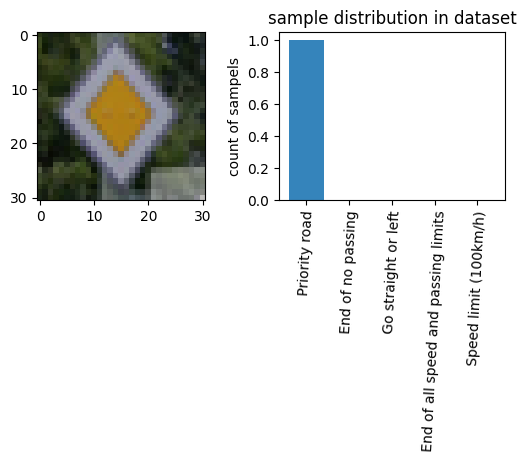

[-1.5080097 -2.171883  -2.575858  -3.1899624 -3.6424806]
tf.Tensor([0.46233836 0.23803638 0.15892757 0.08599974 0.05469794], shape=(5,), dtype=float32)
Best score : Traffic signals
Best score : tf.Tensor(26, shape=(), dtype=int32)


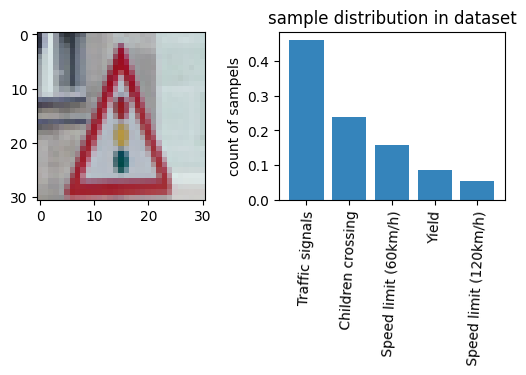

[ 10.213453 -28.04994  -28.067955 -28.34619  -33.123283]
tf.Tensor([1.0000000e+00 2.4122337e-17 2.3691621e-17 1.7937418e-17 1.5104056e-19], shape=(5,), dtype=float32)
Best score : No entry
Best score : tf.Tensor(17, shape=(), dtype=int32)


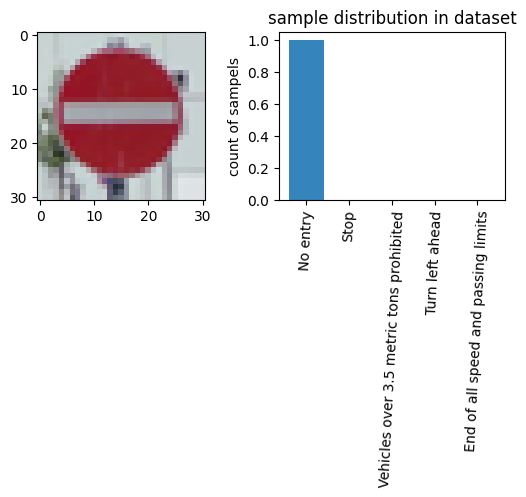

In [286]:

for image in image_list:
    
    input_data = np.array(image) #tf.keras.preprocessing.image.img_to_array( image )
    input_data = tf.expand_dims(input_data, axis=0)
    input_data = normalize(input_data)
    predicts = tf.math.top_k(model.predict(input_data),5)
    indices = predicts.indices
    values = predicts.values
    print(values[0].numpy())
    probs = tf.nn.softmax(values[0], axis=None, name=None)
    print(probs)
    print("Best score : " + labels_list[indices[0][0]])
    print("Best score : " + str(indices[0][0]))
    fig = plt.figure()
    fig.add_subplot(221)
    plt.imshow(image)
    
    fig.add_subplot(222)
    lst = []
    for idx in indices[0].numpy().tolist():
        lst.append(labels_list[idx])
    y_pos = np.arange(len(lst))
    
    plt.ylabel('count of sampels')
    plt.title('sample distribution in dataset')
    plt.xticks(y_pos, lst, rotation='87')
    plt.bar(y_pos, probs.numpy().tolist() , align='center', alpha=0.9)


    plt.show()

#### 